# 分组与聚合

## Grouping

* GroupBy 分组

* 对 数 据 集 进 行 分 组 ， 然 后 对 每 组 进 行 统 计 分 析

* SQL 能 够 对 数 据 进 行 过 滤 ， 分 组 聚 合 
  pandas 能 利 用 groupby 进 行 更 加 复 杂 的 分 组 运 算 

* 分 组 运 算 过 程 
  **split -> apply -> combine**

  Splitting the data into groups based on some criteria / 拆 分 ：分组根据

  Applying a function to each group independently / 应 用 ： 每 个 分 组运行的计算规则

  Combining the results into a data structure / 合 并 ： 把 每 个 分 组 的 计 算 结 果 合 并 起 来b

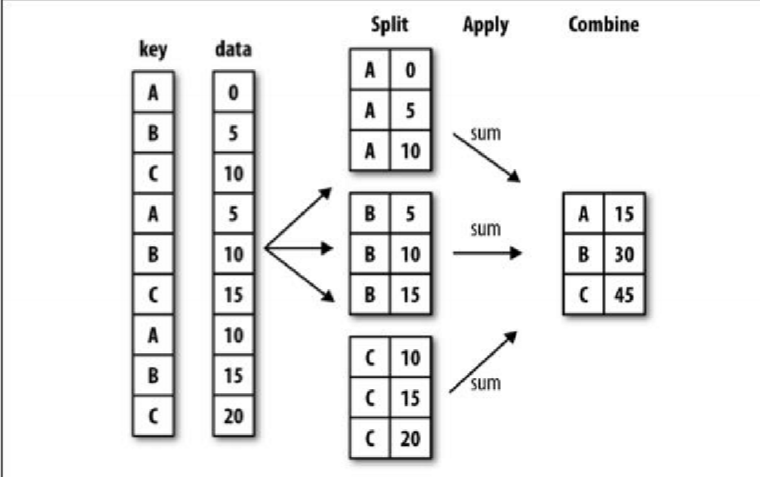

In [30]:
import pandas as pd
import numpy as np

In [31]:
dict_obj = {'key1' : ['a', 'b', 'a', 'b', 
                      'a', 'b', 'a', 'a'],
            'key2' : ['one', 'one', 'two', 'three',
                      'two', 'two', 'one', 'three'],
            'data1': np.random.randn(8),
            'data2': np.random.randn(8)}
df_obj = pd.DataFrame(dict_obj)
print(df_obj)

  key1   key2     data1     data2
0    a    one  2.093580 -0.010989
1    b    one -0.090650 -0.114118
2    a    two -1.206454 -0.826694
3    b  three -0.125512  0.548194
4    a    two  1.153596 -2.325161
5    b    two  0.709278 -1.649838
6    a    one  0.834328 -0.113443
7    a  three  0.833055  0.042385


In [32]:
# dataframe根据key1进行分组
print(type(df_obj.groupby('key1')))
print(df_obj.groupby('key1'))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [4]:
# data1列根据key1进行分组
print(type(df_obj['data1'].groupby(df_obj['key1'])))

<class 'pandas.core.groupby.generic.SeriesGroupBy'>


In [5]:
# 分组运算
grouped1 = df_obj.groupby('key1')
print(grouped1.mean())

grouped2 = df_obj['data1'].groupby(df_obj['key1'])
print(grouped2.mean())

         data1     data2
key1                    
a    -0.340198  0.431948
b    -0.437073 -0.767639
key1
a   -0.340198
b   -0.437073
Name: data1, dtype: float64


In [6]:
# size
print(grouped1.size())
print(grouped2.size())

key1
a    5
b    3
dtype: int64
key1
a    5
b    3
Name: data1, dtype: int64


In [7]:
# 按列名分组
df_obj.groupby('key1')

In [8]:
# 按自定义key分组，列表
self_def_key = [1, 1, 2, 2, 2, 1, 1, 1]
df_obj.groupby(self_def_key).size()

1    5
2    3
dtype: int64

In [9]:
# 按自定义key分组，多层列表
df_obj.groupby([df_obj['key1'], df_obj['key2']]).size()

key1  key2 
a     one      2
      three    1
      two      2
b     one      1
      three    1
      two      1
dtype: int64

In [10]:
# 按多个列多层分组
grouped2 = df_obj.groupby(['key1', 'key2'])
print(grouped2.size())

key1  key2 
a     one      2
      three    1
      two      2
b     one      1
      three    1
      two      1
dtype: int64


In [11]:
# 多层分组按key的顺序进行
grouped3 = df_obj.groupby(['key2', 'key1'])
print(grouped3.mean())
print()
print(grouped3.mean().unstack())

               data1     data2
key2  key1                    
one   a    -1.193535  0.326336
      b    -1.188207 -1.083904
three a    -1.643523  0.285541
      b     1.308860 -1.182381
two   a     1.164801  0.610765
      b    -1.431872 -0.036632

          data1               data2          
key1          a         b         a         b
key2                                         
one   -1.193535 -1.188207  0.326336 -1.083904
three -1.643523  1.308860  0.285541 -1.182381
two    1.164801 -1.431872  0.610765 -0.036632


* GroupBy对象分组迭代

In [12]:
# 单层分组
for group_name, group_data in grouped1:
    print(group_name)
    print(group_data)

a
  key1   key2     data1     data2
0    a    one -1.828584  1.083968
2    a    two  1.480684  0.584255
4    a    two  0.848919  0.637275
6    a    one -0.558486 -0.431297
7    a  three -1.643523  0.285541
b
  key1   key2     data1     data2
1    b    one -1.188207 -1.083904
3    b  three  1.308860 -1.182381
5    b    two -1.431872 -0.036632


In [13]:
# 多层分组
for group_name, group_data in grouped2:
    print(group_name)
    print(group_data)

('a', 'one')
  key1 key2     data1     data2
0    a  one -1.828584  1.083968
6    a  one -0.558486 -0.431297
('a', 'three')
  key1   key2     data1     data2
7    a  three -1.643523  0.285541
('a', 'two')
  key1 key2     data1     data2
2    a  two  1.480684  0.584255
4    a  two  0.848919  0.637275
('b', 'one')
  key1 key2     data1     data2
1    b  one -1.188207 -1.083904
('b', 'three')
  key1   key2    data1     data2
3    b  three  1.30886 -1.182381
('b', 'two')
  key1 key2     data1     data2
5    b  two -1.431872 -0.036632


In [14]:
# GroupBy对象转换list
list(grouped1)

[('a',   key1   key2     data1     data2
  0    a    one -1.828584  1.083968
  2    a    two  1.480684  0.584255
  4    a    two  0.848919  0.637275
  6    a    one -0.558486 -0.431297
  7    a  three -1.643523  0.285541), ('b',   key1   key2     data1     data2
  1    b    one -1.188207 -1.083904
  3    b  three  1.308860 -1.182381
  5    b    two -1.431872 -0.036632)]

In [15]:
# GroupBy对象转换dict
dict(list(grouped1))

{'a':   key1   key2     data1     data2
 0    a    one -1.828584  1.083968
 2    a    two  1.480684  0.584255
 4    a    two  0.848919  0.637275
 6    a    one -0.558486 -0.431297
 7    a  three -1.643523  0.285541, 'b':   key1   key2     data1     data2
 1    b    one -1.188207 -1.083904
 3    b  three  1.308860 -1.182381
 5    b    two -1.431872 -0.036632}

In [16]:
# 按列分组
print(df_obj.dtypes)

# 按数据类型分组
df_obj.groupby(df_obj.dtypes, axis=1).size()
df_obj.groupby(df_obj.dtypes, axis=1).sum()

key1      object
key2      object
data1    float64
data2    float64
dtype: object


,float64,object
0,-0.744616,aone
1,-2.272111,bone
2,2.064939,atwo
3,0.126479,bthree
4,1.486194,atwo
5,-1.468504,btwo
6,-0.989783,aone
7,-1.357983,athree


* 其他分组方法

In [38]:
df_obj2 = pd.DataFrame(np.random.randint(1, 10, (5,5)),
                       columns=['a', 'b', 'c', 'd', 'e'],
                       index=['A', 'B', 'C', 'D', 'E'])
df_obj2.ix[1, 1:4] = np.NaN
df_obj2

C:\Users\ufo_y\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,a,b,c,d,e
A,6,8.0,1.0,3.0,7
B,3,NaN,NaN,NaN,8
C,3,4.0,8.0,1.0,1
D,9,5.0,7.0,4.0,5
E,7,6.0,3.0,3.0,1


In [18]:
# 通过字典分组
mapping_dict = {'a':'python', 'b':'python', 'c':'java', 'd':'C', 'e':'java'}
df_obj2.groupby(mapping_dict, axis=1).size()
df_obj2.groupby(mapping_dict, axis=1).count() # 非NaN的个数
df_obj2.groupby(mapping_dict, axis=1).sum()

,C,java,python
A,3.0,6.0,6.0
B,0.0,1.0,5.0
C,5.0,10.0,14.0
D,4.0,7.0,5.0
E,2.0,8.0,13.0


In [19]:
# 通过函数分组
df_obj3 = pd.DataFrame(np.random.randint(1, 10, (5,5)),
                       columns=['a', 'b', 'c', 'd', 'e'],
                       index=['AA', 'BBB', 'CC', 'D', 'EE'])
df_obj3

,a,b,c,d,e
AA,8,4,6,5,1
BBB,3,3,5,6,6
CC,1,5,5,2,6
D,7,1,3,8,5
EE,7,7,4,3,3


In [20]:
def group_key(idx):
    """
        idx 为列索引或行索引
    """
    #return idx
    return len(idx)

df_obj3.groupby(group_key).size()

# 以上自定义函数等价于
#df_obj3.groupby(len).size()

1    1
2    3
3    1
dtype: int64

In [21]:
# 通过索引级别分组
columns = pd.MultiIndex.from_arrays([['Python', 'Java', 'Python', 'Java', 'Python'],
                                     ['A', 'A', 'B', 'C', 'B']], names=['language', 'index'])
df_obj4 = pd.DataFrame(np.random.randint(1, 10, (5, 5)), columns=columns)
df_obj4

language,Python,Java,Python,Java,Python
index,A,A,B,C,B
0,8,4,9,1,2
1,7,6,3,6,6
2,6,1,1,6,6
3,2,1,6,1,6
4,8,8,1,1,5


In [22]:
# 根据language进行分组
df_obj4.groupby(level='language', axis=1).sum()
df_obj4.groupby(level='index', axis=1).sum()

index,A,B,C
0,12,11,1
1,13,9,6
2,7,7,6
3,3,12,1
4,16,6,1


* 聚合

In [23]:
dict_obj = {'key1' : ['a', 'b', 'a', 'b', 
                      'a', 'b', 'a', 'a'],
            'key2' : ['one', 'one', 'two', 'three',
                      'two', 'two', 'one', 'three'],
            'data1': np.random.randint(1,10, 8),
            'data2': np.random.randint(1,10, 8)}
df_obj5 = pd.DataFrame(dict_obj)
print(df_obj5)

  key1   key2  data1  data2
0    a    one      5      2
1    b    one      3      5
2    a    two      1      3
3    b  three      3      5
4    a    two      3      6
5    b    two      6      8
6    a    one      2      8
7    a  three      9      3


In [24]:
# 内置的聚合函数
print(df_obj5.groupby('key1').sum())
print(df_obj5.groupby('key1').max())
print(df_obj5.groupby('key1').min())
print(df_obj5.groupby('key1').mean())
print(df_obj5.groupby('key1').size())
print(df_obj5.groupby('key1').count())
print(df_obj5.groupby('key1').describe())

      data1  data2
key1              
a        20     22
b        12     18
     key2  data1  data2
key1                   
a     two      9      8
b     two      6      8
     key2  data1  data2
key1                   
a     one      1      2
b     one      3      5
      data1  data2
key1              
a       4.0    4.4
b       4.0    6.0
key1
a    5
b    3
dtype: int64
      key2  data1  data2
key1                    
a        5      5      5
b        3      3      3
     data1                                         data2                      \
     count mean       std  min  25%  50%  75%  max count mean       std  min   
key1                                                                           
a      5.0  4.0  3.162278  1.0  2.0  3.0  5.0  9.0   5.0  4.4  2.509980  2.0   
b      3.0  4.0  1.732051  3.0  3.0  3.0  4.5  6.0   3.0  6.0  1.732051  5.0   

                          
      25%  50%  75%  max  
key1                      
a     3.0  3.0  6.0  8.0  
b     5.0  5.0 

In [25]:
# 自定义聚合函数
def peak_range(df):
    """
        返回数值范围
    """
    #print type(df) #参数为索引所对应的记录
    return df.max() - df.min()

print(df_obj5.groupby('key1').agg(peak_range))
#print(df_obj.groupby('key1').agg(lambda df : df.max() - df.min()))

      data1  data2
key1              
a         8      6
b         3      3


In [26]:
# 应用多个聚合函数

# 同时应用多个聚合函数
print(df_obj.groupby('key1').agg(['mean', 'std', 'count', peak_range])) # 默认列名为函数名

         data1                                data2                           
          mean       std count peak_range      mean       std count peak_range
key1                                                                          
a    -0.340198  1.474043     5   3.309268  0.431948  0.560605     5   1.515265
b    -0.437073  1.516923     3   2.740732 -0.767639  0.634983     3   1.145749


In [27]:
print(df_obj.groupby('key1').agg(['mean', 'std', 'count', ('range', peak_range)])) # 通过元组提供新的列名

         data1                               data2                          
          mean       std count     range      mean       std count     range
key1                                                                        
a    -0.340198  1.474043     5  3.309268  0.431948  0.560605     5  1.515265
b    -0.437073  1.516923     3  2.740732 -0.767639  0.634983     3  1.145749


In [28]:
# 每列作用不同的聚合函数
dict_mapping = {'data1':'mean',
                'data2':'sum'}
print(df_obj.groupby('key1').agg(dict_mapping))

         data1     data2
key1                    
a    -0.340198  2.159742
b    -0.437073 -2.302918


In [29]:
dict_mapping = {'data1':['mean','max'],
                'data2':'sum'}
print(df_obj.groupby('key1').agg(dict_mapping))

         data1               data2
          mean       max       sum
key1                              
a    -0.340198  1.480684  2.159742
b    -0.437073  1.308860 -2.302918
